## Testing notebook to create a deployable version

The objective here is minimize the trained notebook model into a slim version only with the needed content for a Docker image creation.

### Download option
If you are running for the fist time, change the **dlcontent** flag to **True**.

In [1]:
dlcontent = False

### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from tensorflow.keras.models import load_model
import cv2

### Downloads

In [3]:
#Haarcascade
url = 'https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml'
r = requests.get(url, allow_redirects=True)
if dlcontent == True:
    open('haarcascade_frontalface_default.xml', 'wb').write(r.content)

In [4]:
#Model
url_model = 'https://drive.google.com/uc?id=1sNKudyAw7TpCuMVem9jX48eV6N6IwZIV'
output_model = 'model_tl_full_224x224.h5'
!pip install gdown --quiet
import gdown
if dlcontent == True:
    gdown.download(url_model, output_model, quiet=True)

### Load Model

In [5]:
model = load_model('model_tl_full_224x224.h5')

### Functions

In [6]:
def emotion_predict(emotions):
    objects=('Anger    ', 'Disgust  ', 'Fear     ', 'Happiness', 'Neutral  ', 'Sadness  ','Surprise ')
    y_pos = np.arange(len(objects))
    predictions = dict(zip(objects,emotions.tolist()))
    for k, v in predictions.items():
        print(k, ':', '{:.5f}'.format(float(v*100)),'%')

In [7]:
def facecrop(url):
    global sub_face
    resp = requests.get(url, stream=True, timeout=5).raw
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    
    facedata='haarcascade_frontalface_default.xml'
    cascade=cv2.CascadeClassifier(facedata)
    img = cv2.imdecode(image, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    try:
      
        minisize=(img.shape[1],img.shape[0])
        miniframe=cv2.resize(img,minisize)
        
        faces=cascade.detectMultiScale(miniframe)
        
        for f in faces:
            x,y,w,h = [v for v in f]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
            
            sub_face = img[y:y+h, x:x+w]
            sub_face = cv2.resize(sub_face, dsize=(224, 224), interpolation=cv2.INTER_AREA)
            
    except Exception as e:
        print ('Error :',e)

### Testing

In [8]:
#List with samples from a Google search. Add any image you want to be analyzed here.
imgurls = ['https://i.pinimg.com/736x/07/f8/34/07f834771fb9824ff171059a0b2e3b31.jpg',
             'https://ak.picdn.net/shutterstock/videos/23955145/thumb/1.jpg',
             'https://i1.wp.com/greatescapepublishing.com/wp-content/uploads/thephotographerslife/wp-content/media/2013/07/image001.jpg',
             'https://images.pexels.com/photos/3777931/pexels-photo-3777931.jpeg',
             'https://images.newscientist.com/wp-content/uploads/2016/02/gettyimages-520925691.jpg',
             'https://image.shutterstock.com/image-photo/photo-portrait-calm-pretty-girl-260nw-1847880169.jpg',
             'https://image.shutterstock.com/shutterstock/photos/523985029/display_1500/stock-photo-scared-man-face-523985029.jpg']

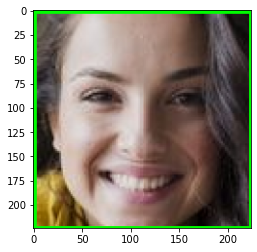

Anger     : 0.00000 %
Disgust   : 0.00000 %
Fear      : 0.00000 %
Happiness : 100.00000 %
Neutral   : 0.00000 %
Sadness   : 0.00000 %
Surprise  : 0.00000 %


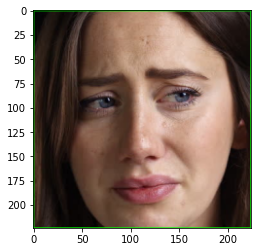

Anger     : 0.00000 %
Disgust   : 0.00000 %
Fear      : 0.00000 %
Happiness : 0.00000 %
Neutral   : 0.00003 %
Sadness   : 99.99996 %
Surprise  : 0.00000 %


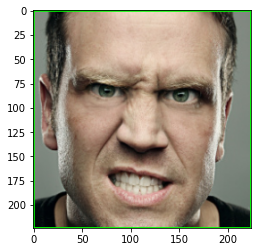

Anger     : 99.99986 %
Disgust   : 0.00006 %
Fear      : 0.00000 %
Happiness : 0.00000 %
Neutral   : 0.00000 %
Sadness   : 0.00000 %
Surprise  : 0.00009 %


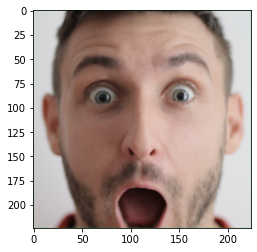

Anger     : 0.00000 %
Disgust   : 0.00000 %
Fear      : 0.00000 %
Happiness : 0.00000 %
Neutral   : 0.00000 %
Sadness   : 0.00000 %
Surprise  : 100.00000 %


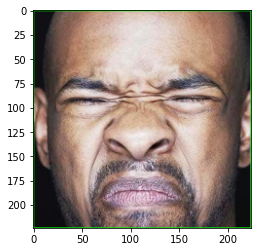

Anger     : 1.24089 %
Disgust   : 98.75911 %
Fear      : 0.00000 %
Happiness : 0.00000 %
Neutral   : 0.00000 %
Sadness   : 0.00000 %
Surprise  : 0.00000 %


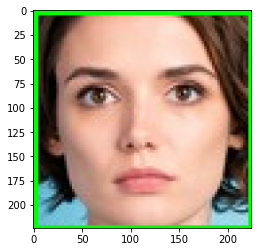

Anger     : 0.00000 %
Disgust   : 0.00179 %
Fear      : 0.00000 %
Happiness : 0.00003 %
Neutral   : 82.09817 %
Sadness   : 0.00044 %
Surprise  : 17.89957 %


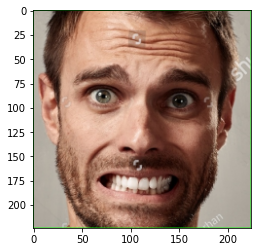

Anger     : 0.01147 %
Disgust   : 0.00000 %
Fear      : 63.04705 %
Happiness : 0.00003 %
Neutral   : 0.00000 %
Sadness   : 0.00061 %
Surprise  : 36.94084 %


In [9]:
for url in imgurls:
    sub_face = ''
    facecrop(url)
    plt.imshow(sub_face)
    plt.show()
#Testing
    x=(np.expand_dims(sub_face, axis=0))/255
    emotion_predict(model.predict(x)[0])